(383, 511)
[[250 207 132 ..., 126 136 210]
 [205 212 136 ..., 207 145 155]
 [108 153 141 ..., 239 165  99]
 ..., 
 [  7  52 138 ..., 106 116  55]
 [ 82  76 137 ...,  53 122 134]
 [183 142 120 ...,  45 120 192]]


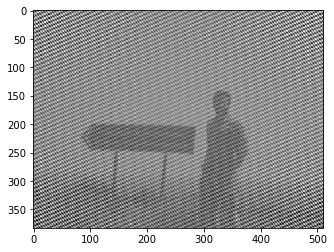

[[  2.63550400e+07     +0.j           2.96576244e+05 +86069.53054444j
    1.07452702e+05+300396.2528621j  ...,  -2.29424427e+05 +89043.93682906j
    1.07452702e+05-300396.2528621j    2.96576244e+05 -86069.53054444j]
 [ -4.95936428e+05-943347.89663827j  -1.63775427e+05+236087.63326523j
   -2.07585510e+05 +29517.28142894j ...,   5.89376541e+04-131652.29516259j
    8.06751488e+04 +94027.18498436j  -1.59708304e+05+306975.50752221j]
 [ -3.24723760e+05-295971.10886165j   1.15881098e+05-119025.74273173j
   -4.71773372e+04 -96409.1040477j  ...,  -1.42672534e+02 +43616.79583043j
    4.32725924e+04 +47025.71122272j   9.92550190e+02-162701.205376j  ]
 ..., 
 [  6.08201666e+04+654623.33663045j   1.02480627e+05-226936.39239603j
   -1.20704708e+05 -35733.55680916j ...,   7.57107817e+03 -51471.0412294j
    7.14951265e+04  +5477.92631096j  -9.91728638e+04 -83560.45501795j]
 [ -3.24723760e+05+295971.10886165j   9.92550190e+02+162701.205376j
    4.32725924e+04 -47025.71122272j ...,   4.33157345e+04 -364

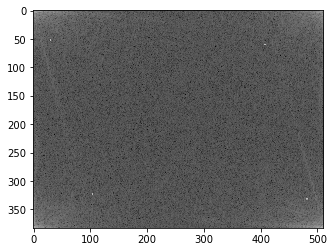

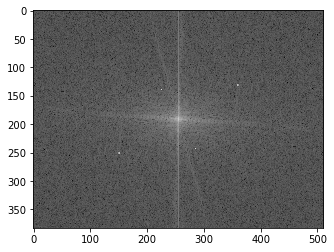

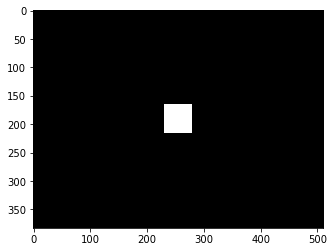

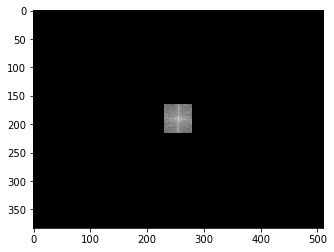

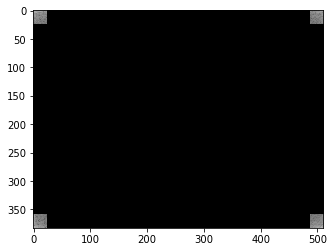

[[ 129.55124268  129.29858795  129.02165657 ...,  130.0870337   129.95021317
   129.77054031]
 [ 132.83524358  132.58355087  132.31101378 ...,  133.41397868
   133.25338909  133.05986896]
 [ 135.80035902  135.54276281  135.26828889 ...,  136.43696067
   136.24938622  136.03679381]
 ..., 
 [ 119.66320061  119.38841648  119.08487015 ...,  120.14026528
   120.05172771  119.88941951]
 [ 122.76870435  122.50194521  122.2066971  ...,  123.25611671
   123.15567366  122.99070237]
 [ 126.12976303  125.87125982  125.58584276 ...,  126.63588517
   126.51923543  126.34879461]]


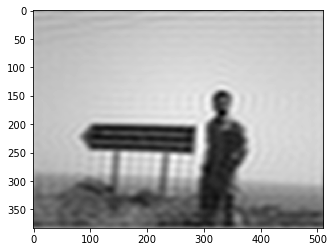

tholi


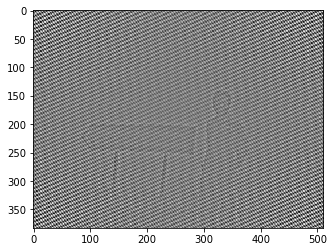

[[ 129.55124268  129.29858795  129.02165657 ...,  130.0870337   129.95021317
   129.77054031]
 [ 132.83524358  132.58355087  132.31101378 ...,  133.41397868
   133.25338909  133.05986896]
 [ 135.80035902  135.54276281  135.26828889 ...,  136.43696067
   136.24938622  136.03679381]
 ..., 
 [ 119.66320061  119.38841648  119.08487015 ...,  120.14026528
   120.05172771  119.88941951]
 [ 122.76870435  122.50194521  122.2066971  ...,  123.25611671
   123.15567366  122.99070237]
 [ 126.12976303  125.87125982  125.58584276 ...,  126.63588517
   126.51923543  126.34879461]]


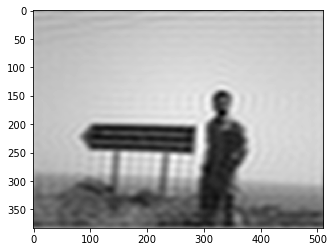

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.fft import fft2
from numpy.fft import fftshift
import scipy
from scipy import ndimage



f = np.array(Image.open("degraded.png"))
nrows,ncols = f.shape
gmask = np.zeros(shape=(nrows,ncols))
f2 = np.zeros(shape=(nrows,ncols))
C1 = np.zeros(shape=(nrows,ncols))
C2 = np.zeros(shape=(nrows+6,ncols+6))
C3 = np.zeros(shape=(nrows,ncols))
print(f.shape)
print(f)
plt.imshow(f,cmap="gray")
plt.show()

F = fft2(f)
print(F)
plt.imshow(np.log(1+np.abs(F)),cmap="gray")
plt.show()

Fshifted = fftshift(F)
plt.imshow(np.log(1+np.abs(Fshifted)),cmap="gray")
plt.show()


H =np.zeros_like(F)
spectrum_center = [x // 2 for x in F.shape]
platos = 25
H[spectrum_center[0]-platos:spectrum_center[0]+platos,spectrum_center[1]-platos:spectrum_center[1]+platos]=1.
plt.imshow(np.log(1+np.abs(H)),cmap="gray")
plt.show()

Ffiltered_shifted = Fshifted * H
plt.imshow(np.log(1+np.abs(Ffiltered_shifted)),cmap="gray")
plt.show()

from numpy.fft import ifftshift
Ffiltered = ifftshift(Ffiltered_shifted)
plt.imshow(np.log(1+np.abs(Ffiltered)),cmap="gray")
plt.show()

from numpy.fft import ifft2
f_filtered = np.abs(ifft2(Ffiltered))
print(f_filtered)
plt.imshow(f_filtered,cmap="gray")
plt.show()
print("tholi")
########################################################################
scipy.misc.imsave('metaapoFourier.png',f_filtered)

def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

# Load the data...
im = np.array(Image.open("degraded.png"))


# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(data, 3)
gauss_highpass = data - lowpass
plt.imshow(gauss_highpass,cmap='gray')
plt.show()

from numpy.fft import ifft2

highpass_3x3 = np.abs(ifft2(Ffiltered))

print(highpass_3x3)
plt.imshow(highpass_3x3,cmap='gray')
plt.show()


